In [7]:
import requests
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime
import json
import geopandas as gpd
import geoplot as gpt
from pprint import pprint
from time import time
from time import sleep

In [2]:
r = requests.get("https://disease.sh/v3/covid-19/historical/all?lastdays=all")
r.status_code
data_json = r.json()
df = pd.DataFrame(data_json)
print(df)

              cases   deaths  recovered
1/22/20         557       17         30
1/23/20         655       18         32
1/24/20         941       26         39
1/25/20        1434       42         42
1/26/20        2118       56         56
...             ...      ...        ...
10/10/21  237879268  4851586          0
10/11/21  238272643  4857420          0
10/12/21  238705193  4865619          0
10/13/21  239167859  4874258          0
10/14/21  239608139  4882066          0

[632 rows x 3 columns]


,cases,deaths,recovered
1/22/20,557,17,30
1/23/20,655,18,32
1/24/20,941,26,39
1/25/20,1434,42,42
1/26/20,2118,56,56
...,...,...,...
10/10/21,237879268,4851586,0
10/11/21,238272643,4857420,0
10/12/21,238705193,4865619,0
10/13/21,239167859,4874258,0


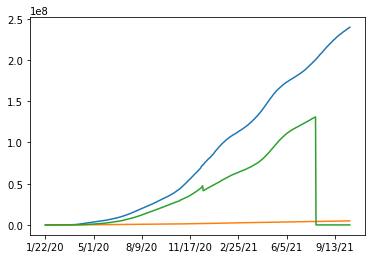

In [3]:
df['cases'].plot.line()
df['deaths'].plot.line()
df['recovered'].plot.line()
df

In [4]:
!pip install cufflinks --upgrade

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68729 sha256=f806e2c0f66a7c7905e3ed0e2a023f17aa61bba25ee6e4fa9e1dadbda39bf0c1
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [5]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [6]:
df1=df[['cases','deaths','recovered']]
layout =dict(title='Covid History',xaxis= dict(title='la date'),yaxis=dict(title='valeur'))
df1.iplot(filename='cf-simple-line-chart',layout=layout)

In [17]:
rep = requests.get("https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=1")
df_json = rep.json()
df_json

[{'country': 'Afghanistan', 'timeline': {'10/14/21': 2369625}},
 {'country': 'Albania', 'timeline': {'10/14/21': 1810433}},
 {'country': 'Algeria', 'timeline': {'10/14/21': 14082920}},
 {'country': 'Andorra', 'timeline': {'10/14/21': 102032}},
 {'country': 'Angola', 'timeline': {'10/14/21': 4074677}},
 {'country': 'Anguilla', 'timeline': {'10/14/21': 18704}},
 {'country': 'Antigua and Barbuda', 'timeline': {'10/14/21': 98840}},
 {'country': 'Argentina', 'timeline': {'10/14/21': 54353322}},
 {'country': 'Armenia', 'timeline': {'10/14/21': 514241}},
 {'country': 'Aruba', 'timeline': {'10/14/21': 157866}},
 {'country': 'Australia', 'timeline': {'10/14/21': 31679382}},
 {'country': 'Austria', 'timeline': {'10/14/21': 10982143}},
 {'country': 'Azerbaijan', 'timeline': {'10/14/21': 9037099}},
 {'country': 'Bahamas', 'timeline': {'10/14/21': 224531}},
 {'country': 'Bahrain', 'timeline': {'10/14/21': 2684265}},
 {'country': 'Bangladesh', 'timeline': {'10/14/21': 55723900}},
 {'country': 'Barba

In [18]:
df1 = pd.DataFrame(df_json)
df1.timeline.tolist()

[{'10/14/21': 2369625},
 {'10/14/21': 1810433},
 {'10/14/21': 14082920},
 {'10/14/21': 102032},
 {'10/14/21': 4074677},
 {'10/14/21': 18704},
 {'10/14/21': 98840},
 {'10/14/21': 54353322},
 {'10/14/21': 514241},
 {'10/14/21': 157866},
 {'10/14/21': 31679382},
 {'10/14/21': 10982143},
 {'10/14/21': 9037099},
 {'10/14/21': 224531},
 {'10/14/21': 2684265},
 {'10/14/21': 55723900},
 {'10/14/21': 255645},
 {'10/14/21': 3862369},
 {'10/14/21': 16719897},
 {'10/14/21': 344463},
 {'10/14/21': 247674},
 {'10/14/21': 87723},
 {'10/14/21': 1083271},
 {'10/14/21': 6931689},
 {'10/14/21': 35845},
 {'10/14/21': 1242203},
 {'10/14/21': 690001},
 {'10/14/21': 249340259},
 {'10/14/21': 33075},
 {'10/14/21': 552265},
 {'10/14/21': 2607096},
 {'10/14/21': 297231},
 {'10/14/21': 25772396},
 {'10/14/21': 476512},
 {'10/14/21': 57310773},
 {'10/14/21': 460484},
 {'10/14/21': 109668},
 {'10/14/21': 207004},
 {'10/14/21': 173184},
 {'10/14/21': 33522333},
 {'10/14/21': 2225504000},
 {'10/14/21': 43315450},
 {

In [19]:
df2 = pd.read_json(json.dumps(df1.timeline.tolist()), orient="records") 
df2.columns
df2.columns = ['timeline'] 

In [20]:
df1.drop(["timeline"], axis=1, inplace=True)
data = pd.concat([df1,df2], axis=1)
data.head(10)

,country,timeline
0,Afghanistan,2369625
1,Albania,1810433
2,Algeria,14082920
3,Andorra,102032
4,Angola,4074677
5,Anguilla,18704
6,Antigua and Barbuda,98840
7,Argentina,54353322
8,Armenia,514241
9,Aruba,157866


In [22]:
# VISUALISATION

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


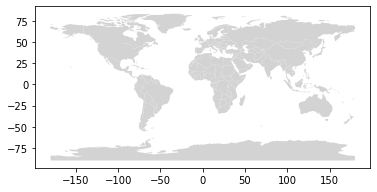

In [23]:
countries.plot(color="lightgrey")

In [24]:
gpt.polyplot(world, figsize=(8, 4))

AttributeError: module 'geoplot' has no attribute 'polyplot'

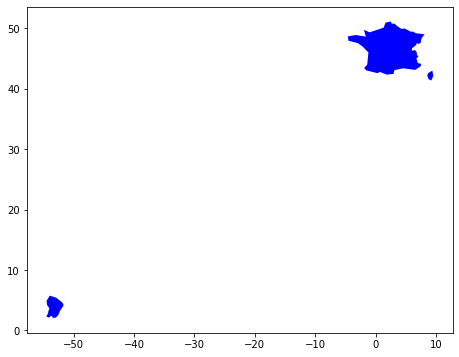

In [25]:
countries[countries["name"] == "France"].plot(color="blue",figsize=(12, 6))

In [26]:
req = requests.get("https://disease.sh/v3/covid-19/all")
req.status_code
df_req = req.json()
df = pd.DataFrame([df_req])
df
new_df = df.transpose()
new_df.rename(columns={0: 'value'}, inplace=True)

df3=new_df.head(50)

print(df3['value'].cases)
print(df3['value'].deaths)
print(df3['value'].recovered)



240493446.0
4899551.0
217778228.0


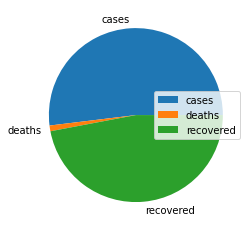

In [31]:
y = np.array([df3['value'].cases, df3['value'].deaths, df3['value'].recovered])
mylabels = ["cases", "deaths", "recovered"]

plt.pie(y, labels = mylabels)
plt.legend(loc="right")
plt.show()

In [33]:
#  url pour le cas de usa https://disease.sh/v3/covid-19/countries/usa
r = requests.get("https://disease.sh/v3/covid-19/countries/usa")
r.status_code
df_r = r.json()
df = pd.DataFrame([df_r])
df
new_df = df.transpose()
new_df.rename(columns={0: 'value'}, inplace=True)

df4=new_df.head(10)

print(df4['value'].cases)
print(df4['value'].deaths)
print(df4['value'].recovered)

45639012
741893
35205258


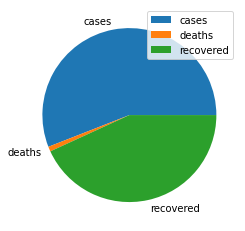

In [10]:
y = np.array([df4['value'].cases, df4['value'].deaths, df4['value'].recovered])
mylabels = ["cases", "deaths", "recovered"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show()

In [11]:
!pip install flask

In [ ]:
!pip install --upgrade Flask

In [ ]:
from flask import Flask, Markup, render_template

app = Flask(__name__)

labels = [
    'JAN', 'FEB', 'MAR', 'APR',
    'MAY', 'JUN', 'JUL', 'AUG',
    'SEP', 'OCT', 'NOV', 'DEC'
]

values = [
    967.67, 1190.89, 1079.75, 1349.19,
    2328.91, 2504.28, 2873.83, 4764.87,
    4349.29, 6458.30, 9907, 16297
]

colors = [
    "#F7464A", "#46BFBD", "#FDB45C", "#FEDCBA",
    "#ABCDEF", "#DDDDDD", "#ABCABC", "#4169E1",
    "#C71585", "#FF4500", "#FEDCBA", "#46BFBD"]

@app.route('/line')
def line():
    line_labels=labels
    line_values=values
    return render_template('templates/line_chart.html', title='Bitcoin Monthly Price in USD', max=17000, labels=line_labels, values=line_values)

if __name__ == '__main__':
    app.run('localhost', 8080)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [15/Oct/2021 12:27:14] "GET / HTTP/1.1" 404 -
[2021-10-15 12:27:25,754] ERROR in app: Exception on /line [GET]
Traceback (most recent call last):
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "<ipython-input-12-b6f664853a50>", line 26, in line
    return render_temp

In [ ]:
from flask import Flask, Markup, render_template

app = Flask(__name__)

labels = [
    'JAN', 'FEB', 'MAR', 'APR',
    'MAY', 'JUN', 'JUL', 'AUG',
    'SEP', 'OCT', 'NOV', 'DEC'
]

values = [
    967.67, 1190.89, 1079.75, 1349.19,
    2328.91, 2504.28, 2873.83, 4764.87,
    4349.29, 6458.30, 9907, 16297
]

colors = [
    "#F7464A", "#46BFBD", "#FDB45C", "#FEDCBA",
    "#ABCDEF", "#DDDDDD", "#ABCABC", "#4169E1",
    "#C71585", "#FF4500", "#FEDCBA", "#46BFBD"]

@app.route('/line')
def line():
    line_labels=labels
    line_values=values
    return render_template('templates/line_chart.html', title='Bitcoin Monthly Price in USD', max=17000, labels=line_labels, values=line_values)

if __name__ == '__main__':
    app.debug = True
    app.run('localhost', 8080)